In [40]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
#importing the dataset
df = pd.read_csv('matches.csv')

In [42]:
#checking the shape of the dataset
df.shape

(756, 18)

In [43]:
df.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [44]:
match_2017 = df[df['season'] == 2017]

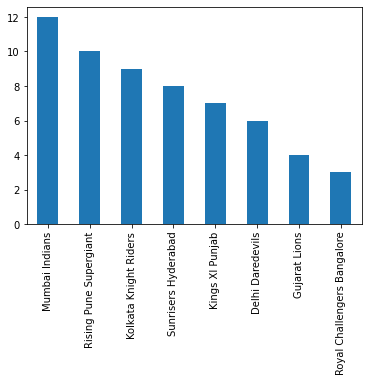

In [45]:
#There were total of 59 Matches played in season 2017
match_2017['winner'].value_counts().plot(kind = 'bar')

# here we can see that Mumbai indian won the ipl 2017.
# 2nd Runnerup = Pune supergian
#3rd = KKR

In [51]:
#total no. of season we are doing analaysis on
len(df['season'].unique())

12

In [73]:
#which team won by maximum runs
df.iloc[df['win_by_runs'].idxmax()]

#here, we can see that Mumbai Indians is the only team with maximum runs win with 146 and played in 2017

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [75]:
df.iloc[df['win_by_wickets'].idxmax()]
# winner-Kolkata Knight Riders, with total of 10 wicktes



id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [92]:
df.iloc[df[df['win_by_runs'].ge(1)].win_by_runs.idxmin()]


id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

In [93]:
df[df[df['win_by_runs'].ge(1)].win_by_runs.min() == df['win_by_runs']][['winner', 'win_by_runs']] # here ge(1), will look for the runs = 1

,winner,win_by_runs
58,Mumbai Indians,1
105,Kings XI Punjab,1
163,Kings XI Punjab,1
344,Delhi Daredevils,1
350,Mumbai Indians,1
518,Chennai Super Kings,1
598,Gujarat Lions,1
614,Royal Challengers Bangalore,1
734,Royal Challengers Bangalore,1
755,Mumbai Indians,1


In [114]:
df.iloc[df[df['win_by_wickets']==1].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

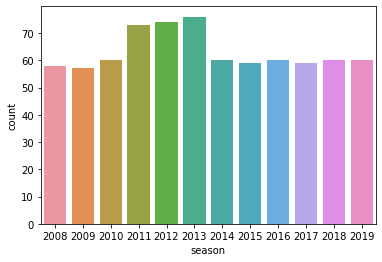

In [115]:
#which season as most no of matches
sns.countplot(x = 'season', data = df)

#we can see that 2013 season ipl as most no of matches

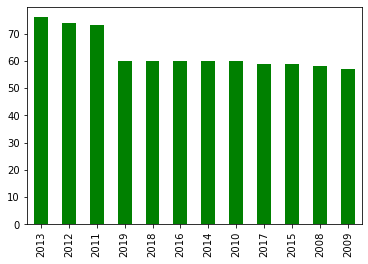

In [123]:
#other way to find the most no of matches
df['season'].value_counts().plot(kind = 'bar',color = 'g')

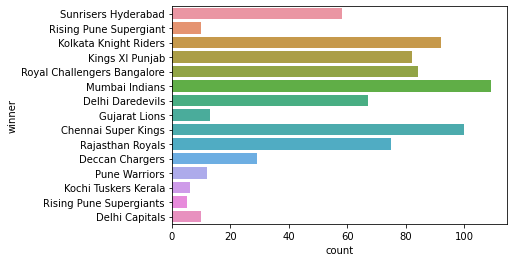

In [125]:
sns.countplot(y = df['winner'])

# mumbai indians seems to the most successgul ipl team of all the season

In [127]:
#Top player of the match Winners¶
top_players = df['player_of_match'].value_counts()[:10]

In [140]:
top_players.keys()

Index(['CH Gayle', 'AB de Villiers', 'DA Warner', 'MS Dhoni', 'RG Sharma',
       'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'MEK Hussey'],
      dtype='object')

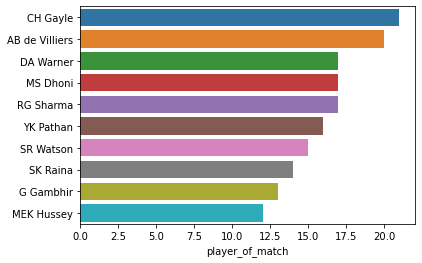

In [143]:
sns.barplot(y = top_players.keys(), x = top_players)

#CH gayle seems to be most values player with most player_of_the match titles

In [151]:
win =df['toss_winner'] == df['winner']

In [153]:
round(win.groupby(win).size()/win.count()*100,2)

False    48.02
True     51.98
dtype: float64

In [158]:
#team with most average wins
df[df['win_by_runs']> 0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)

winner
Delhi Capitals                 37.0
Rising Pune Supergiants        26.5
Rajasthan Royals               26.0
Mumbai Indians                 25.0
Kolkata Knight Riders          24.5
Chennai Super Kings            24.0
Pune Warriors                  23.0
Royal Challengers Bangalore    20.0
Rising Pune Supergiant         20.0
Kings XI Punjab                17.0
Delhi Daredevils               17.0
Sunrisers Hyderabad            15.5
Deccan Chargers                14.5
Kochi Tuskers Kerala           11.5
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64

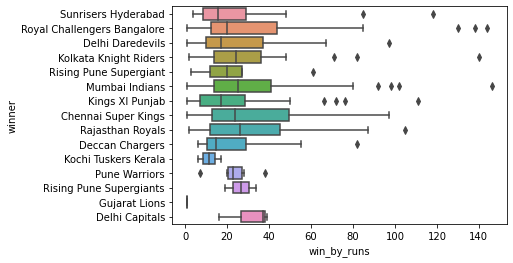

In [160]:
#plotting some graphs
sns.boxplot(x = 'win_by_runs', y = 'winner', data = df[df['win_by_runs']>0])

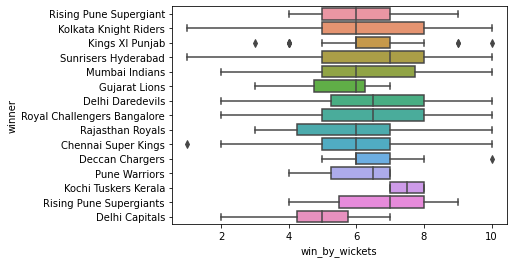

In [178]:
sns.boxplot(y = 'winner', x = 'win_by_wickets', data = df[df['win_by_wickets']>0])